In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Alzamir\Alzheimer-s-Disease\alzheimers_disease_data.csv")

In [3]:
data.sample(1)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
2055,6806,85,0,2,2,15.686087,0,18.665708,8.192486,1.920367,...,0,1,5.682201,0,0,0,0,1,1,XXXConfid


In [4]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [5]:
data.drop(columns=["PatientID",'DoctorInCharge'] , inplace=True)

In [6]:
data.shape

(2149, 33)

In [7]:
data['Diagnosis'].value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

# Handling Imbalance data
## Balanced Random Forest Classifier

In [8]:
X = data.drop(columns=['Diagnosis']) 
y = data['Diagnosis']

In [9]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import cross_val_score

brf = BalancedRandomForestClassifier(random_state=42)
scores = cross_val_score(brf, X, y, cv=5, scoring='f1')

print("F1 scores:", scores)
print("Mean F1:", scores.mean())


c:\Anacondaa\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Anacondaa\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
c:\Anacondaa\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Anacondaa\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `s

F1 scores: [0.94904459 0.96815287 0.97419355 0.97368421 0.71272727]
Mean F1: 0.915560496773997


c:\Anacondaa\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Anacondaa\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
c:\Anacondaa\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Anacondaa\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `s

In [ ]:
# Eaasy Ensemble Classifier

from imblearn.ensemble import EasyEnsembleClassifier

eec = EasyEnsembleClassifier(random_state=42)
scores = cross_val_score(eec, X, y, cv=5, scoring='f1')

print("F1 scores:", scores)
print("Mean F1:", scores.mean())

F1 scores: [0.88145897 0.86956522 0.89552239 0.89614243 0.7173913 ]
Mean F1: 0.8520160619197206


In [ ]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = SVC(probability=True)

voting = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('svc', clf3)
], voting='soft')

scores = cross_val_score(voting, X, y, cv=5, scoring='f1')
print("F1 scores:", scores)
print("Mean F1:", scores.mean())


c:\Anacondaa\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Anacondaa\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

F1 scores: [0.81560284 0.81294964 0.73992674 0.82857143 0.53874539]
Mean F1: 0.7471592066238493


## Feature Selection

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

1. Feature Importance from Random Forest (Regressor) → GridSearchCV

Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


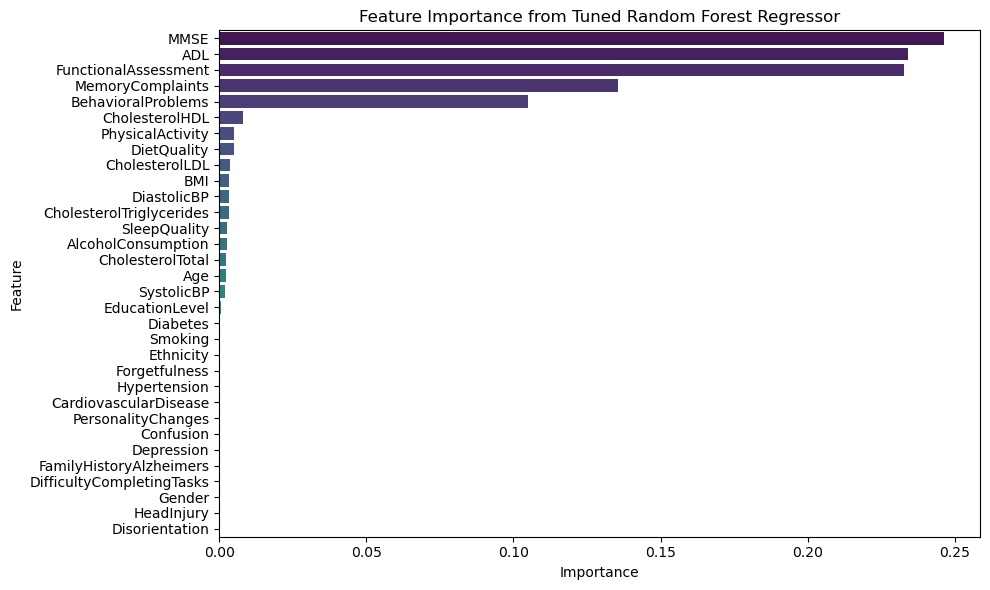

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='r2'
)
grid_search.fit(X_train, y_train)

# Best tuned model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Feature importance
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create DataFrame for plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance from Tuned Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


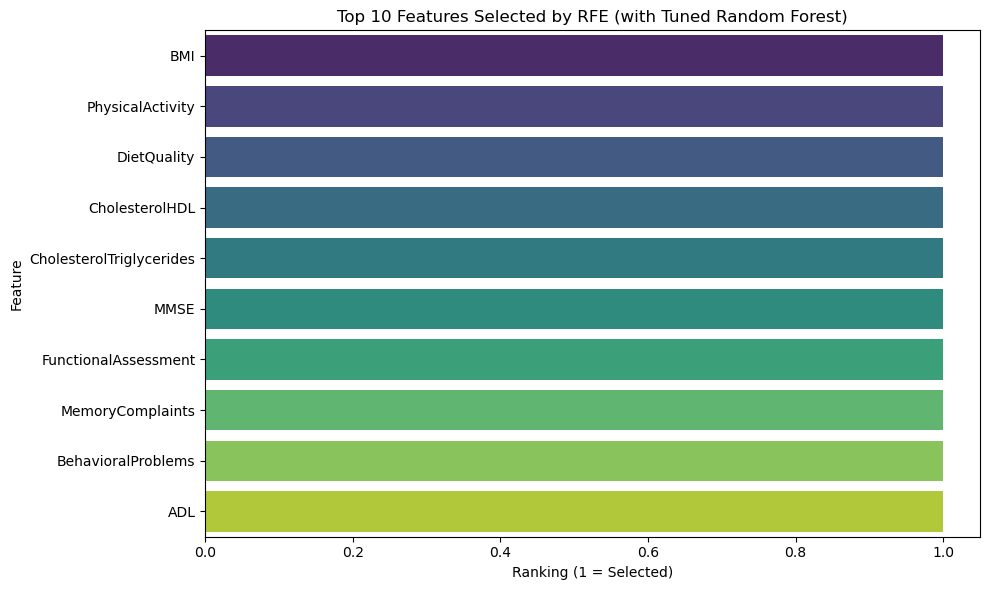

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 1: Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best tuned model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Step 2: Apply RFE with tuned model
rfe = RFE(best_rf, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Step 3: Extract selected features
selected_features = X_train.columns[rfe.support_]
ranking = rfe.ranking_

# Step 4: Prepare DataFrame
rfe_results = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': ranking
})

selected = rfe_results[rfe_results['Ranking'] == 1]

# Step 5: Plot selected features
plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=selected, palette='viridis')
plt.title('Top 10 Features Selected by RFE (with Tuned Random Forest)')
plt.xlabel('Ranking (1 = Selected)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 2916 candidates, totalling 8748 fits


c:\Anacondaa\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:35:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 1}


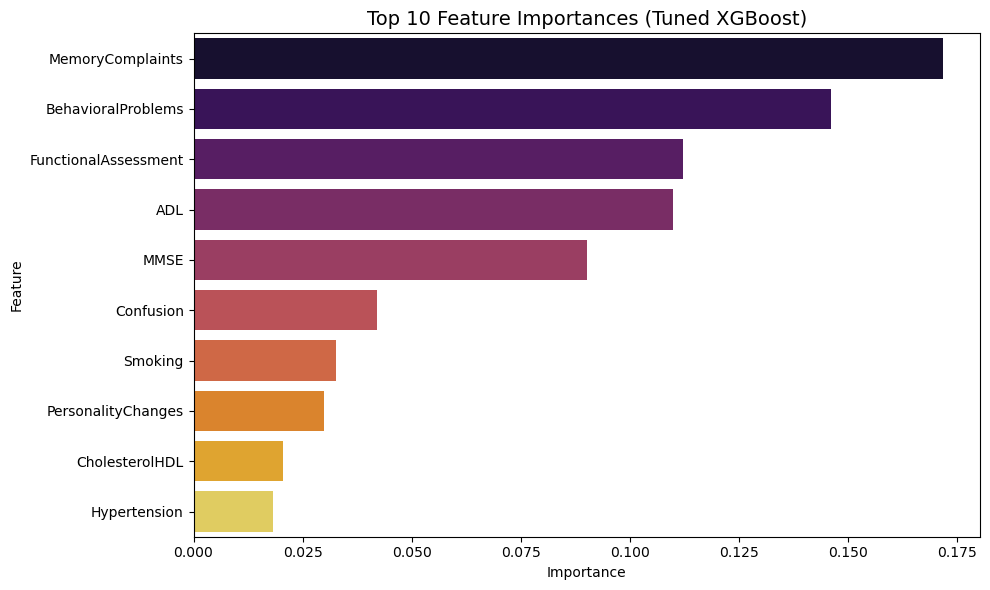

In [16]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# Parameter grid
# ===============================
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees
    'max_depth': [3, 5, 7],               # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],    # Step size shrinkage
    'subsample': [0.8, 1],                 # Fraction of samples per tree
    'colsample_bytree': [0.8, 1],          # Fraction of features per tree
    'gamma': [0, 1, 5],                    # Minimum loss reduction for split
    'reg_alpha': [0, 0.1, 1],              # L1 regularization
    'reg_lambda': [1, 1.5, 2]              # L2 regularization
}

# ===============================
# Create XGBClassifier
# ===============================
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# ===============================
# GridSearchCV
# ===============================
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit
grid_search.fit(X_train, y_train)

# ===============================
# Best model and parameters
# ===============================
best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# ===============================
# Feature importance DataFrame
# ===============================
importances = best_xgb.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# ===============================
# Plot Top 10
# ===============================
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='inferno')
plt.title('Top 10 Feature Importances (Tuned XGBoost)', fontsize=14)
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


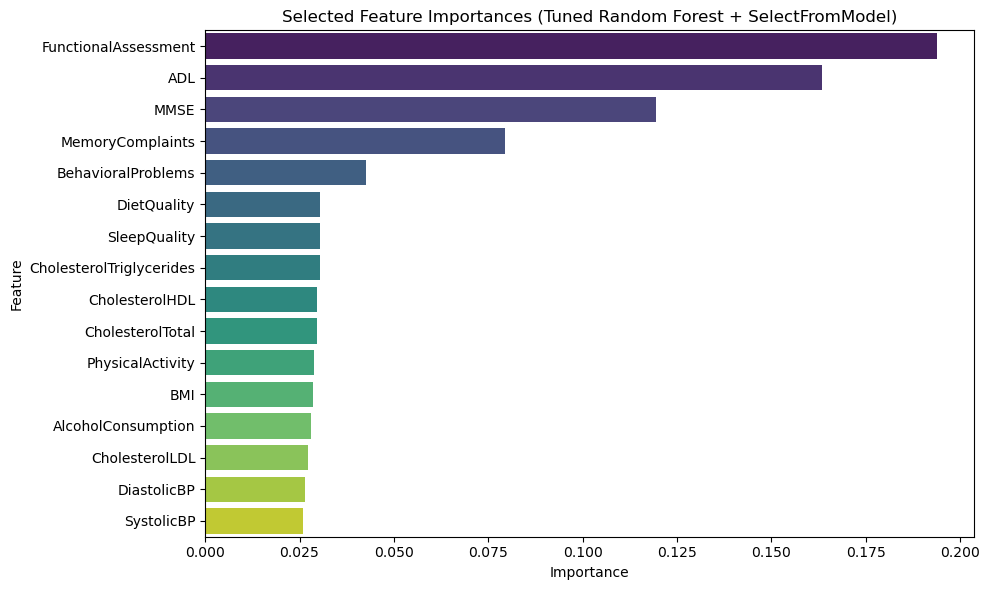

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 1: Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],   # number of trees
    'max_depth': [None, 5, 10],        # tree depth
    'min_samples_split': [2, 5],       # min samples to split
    'min_samples_leaf': [1, 2]         # min samples at leaf
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best tuned model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Step 2: Select features using SelectFromModel with tuned model
sfm = SelectFromModel(best_rf, threshold='median')
sfm.fit(X_train, y_train)

# Step 3: Get selected features & importance
selected_features = X_train.columns[sfm.get_support()]
importances = sfm.estimator_.feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Step 4: Keep only selected features
selected_feat_imp = feat_imp_df[feat_imp_df['Feature'].isin(selected_features)]
selected_feat_imp = selected_feat_imp.sort_values(by='Importance', ascending=False)

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=selected_feat_imp, palette='viridis')
plt.title('Selected Feature Importances (Tuned Random Forest + SelectFromModel)')
plt.tight_layout()
plt.show()


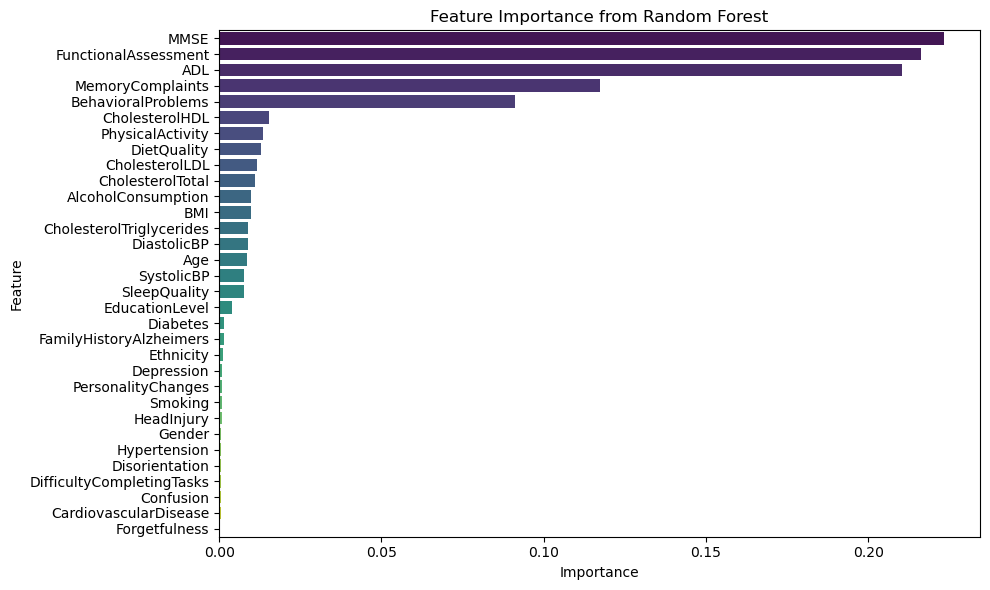

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Feature importance
importances = rf_model.feature_importances_
feature_names = X_train.columns

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


## Recursive Feature Elimination (RFE)


Selects features by recursively removing least important ones

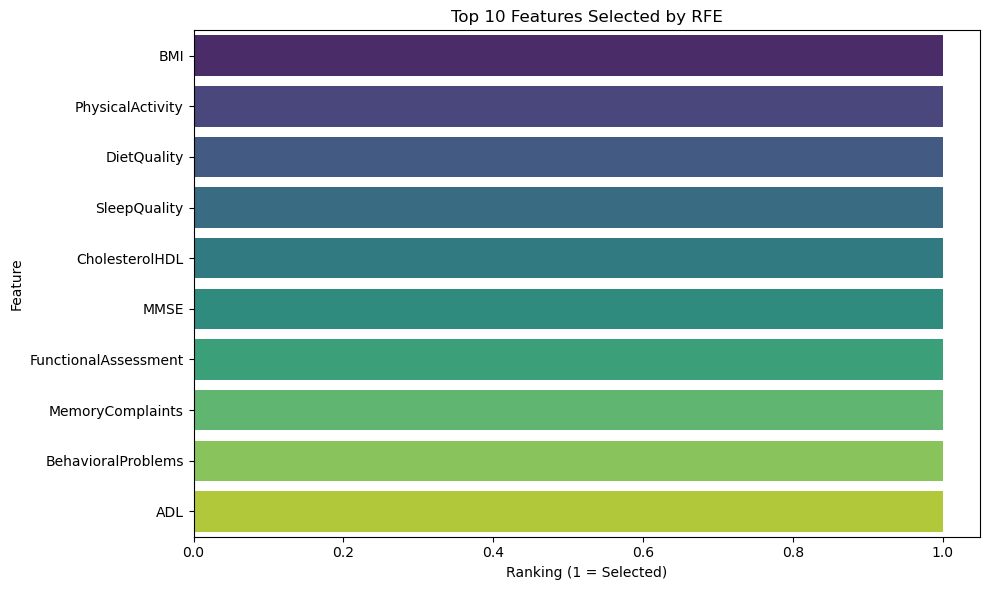

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Apply RFE
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

# Get selected features and their ranks
selected_features = X.columns[rfe.support_]
ranking = rfe.ranking_

# Prepare DataFrame for plotting
rfe_results = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': ranking
})
selected = rfe_results[rfe_results['Ranking'] == 1]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=selected, palette='viridis')
plt.title('Top 10 Features Selected by RFE')
plt.xlabel('Ranking (1 = Selected)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## Feature Importance from XGBoost 


Powerful and commonly used in competitions

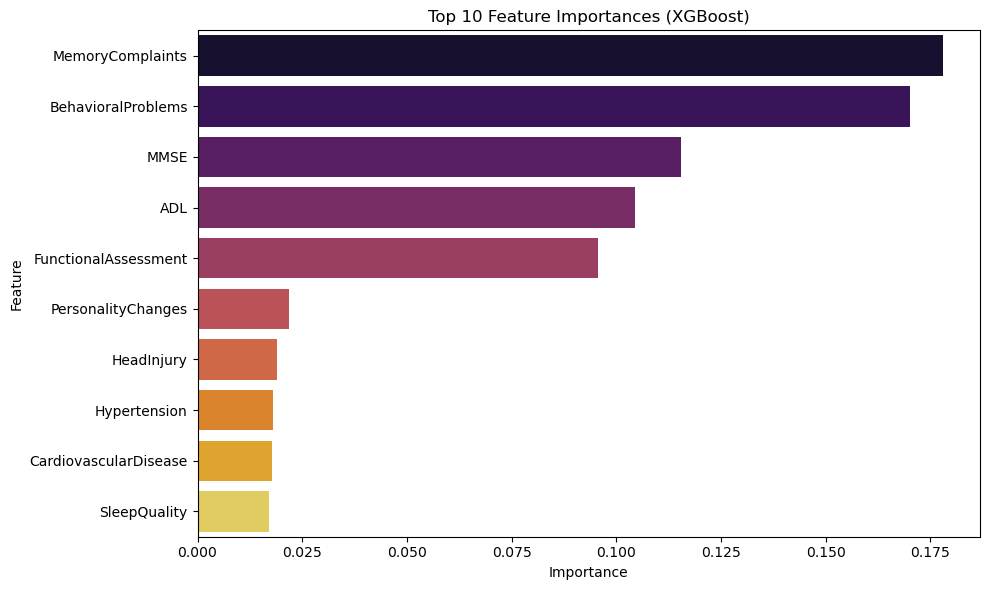

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from xgboost import XGBClassifier

# Train model
model = XGBClassifier()
model.fit(X, y)

# Get importances and sort them
importances = model.feature_importances_
sorted_idx = importances.argsort()[::-1]
top_features = [X.columns[i] for i in sorted_idx[:10]]
top_importances = importances[sorted_idx[:10]]

# Create DataFrame for plotting
feat_imp_df = pd.DataFrame({
    'Feature': top_features,
    'Importance': top_importances
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='inferno')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


## SelectFromModel (Using feature importance)


Automatically selects features above a threshold 

tresold = 'median' (Keep only those features whose importance score is greater than the median importance score of all features)

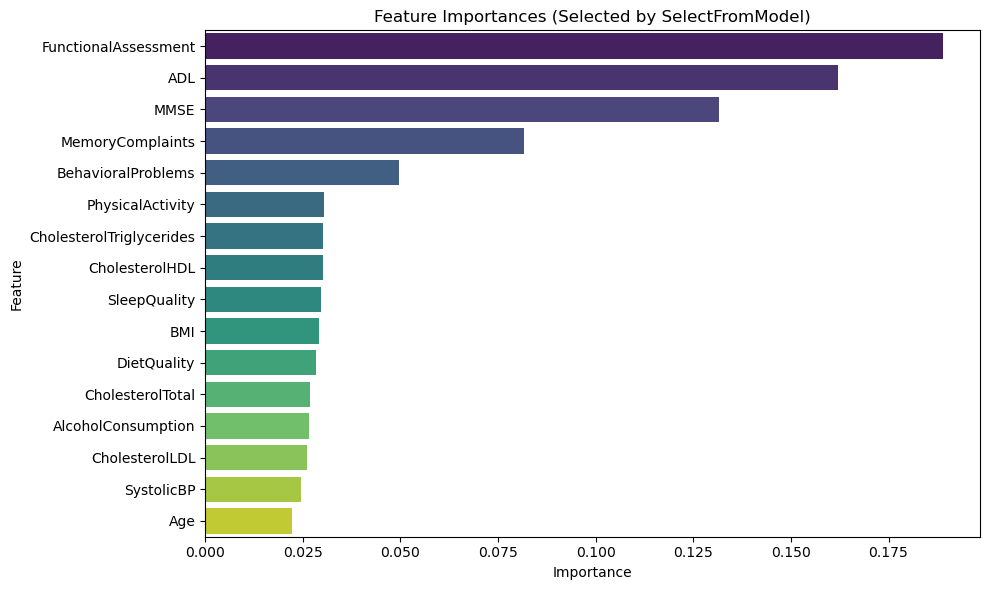

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Fit model and select features
model = RandomForestClassifier()
sfm = SelectFromModel(model, threshold='median')
sfm.fit(X, y)

# Get selected features
selected_features = X.columns[sfm.get_support()]
importances = sfm.estimator_.feature_importances_

# Create DataFrame for plotting
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Filter only selected features
selected_feat_imp = feat_imp[feat_imp['Feature'].isin(selected_features)]
selected_feat_imp = selected_feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=selected_feat_imp, palette='viridis')
plt.title('Feature Importances (Selected by SelectFromModel)')
plt.tight_layout()
plt.show()
